In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df = df.drop(["citric acid", "density"], axis=1)

In [8]:
df

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,29.0,40.0,3.42,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,32.0,44.0,3.57,0.71,10.2,5


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
X = df.drop(['quality'], axis=1).values
y = df['quality'].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [17]:
mean_squared_error(y_pred, y_test)

0.4633584381871179

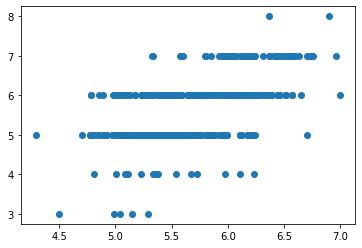

In [18]:
plt.scatter(y_pred, y_test)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

In [21]:
linear = LinearRegression()
linear.fit(X_train_tr, y_train)
y_pred_tr = linear.predict(X_test_tr)

In [22]:
mean_squared_error(y_pred_tr, y_test)

0.4633584381871185